In [103]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

def imshow(image):
    plt.imshow(image)

def imshow_grayscale(image, extent=None):
    plt.imshow(image, cmap="gray", extent=extent)

def imshow_grayscale_m(images, extent=None):
    imshow_grayscale(np.concatenate(images, axis=1), extent)


%matplotlib inline
%load_ext autoreload
%autoreload 2


In [2]:
from ps1_python.find_circles import find_circles
from ps1_python.hough_circles_acc import hough_circles_acc
from ps1_python.hough_lines_acc import hough_lines_acc
from ps1_python.hough_lines_draw import hough_lines_draw
from ps1_python.hough_peaks import hough_peaks

### 1) Load the input and generate an edge image

Load grayscale image (input/ps1-input0.png) as img and generate an edge image – which is a binary image with white pixels (1) on the edges and black pixels (0) elsewhere

128 240 16


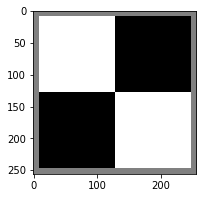

In [107]:
figsize(3, 3)
im = cv2.imread("ps1_python/input/ps1-input0.png", cv2.IMREAD_GRAYSCALE)
imshow_grayscale(im)
print(im[0, 0], im[50, 50], im[50, 200])

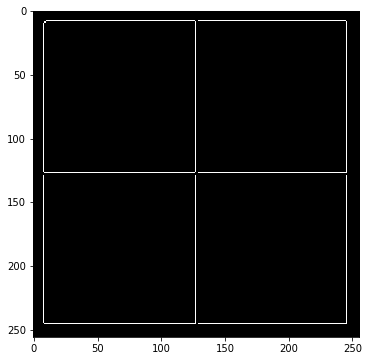

In [108]:
figsize(6, 6)
c = cv2.Canny(im, 10, 200)  # all the threshold params I tried work
imshow_grayscale(c)


### 2) Implement a Hough Transform method for finding lines.

a) Write a function hough_lines_acc that computes the Hough Transform for lines and produces an accumulator array. 

In [69]:
np.sum(c > 0)

1406

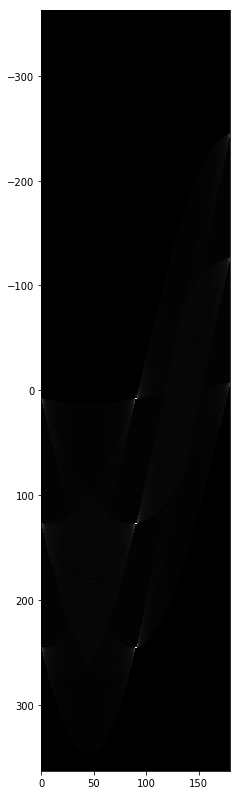

In [83]:
figsize(14, 14)
h, max_rho = hough_lines_acc(c)
imshow_grayscale(h, extent=(0, 180, max_rho, -max_rho))


In [84]:
sorted([(x, rh-max_rho, th) for (rh, th), x in np.ndenumerate(h)], reverse=True)[:20]


[(255, 245, 90),
 (255, 245, 0),
 (254, 127, 90),
 (254, 127, 0),
 (252, 8, 90),
 (252, 8, 0),
 (65, 246, 89),
 (65, 246, 1),
 (65, 128, 89),
 (65, 128, 1),
 (64, 242, 91),
 (64, 130, 89),
 (64, 130, 1),
 (64, 126, 91),
 (64, 124, 91),
 (64, 11, 89),
 (64, 11, 1),
 (64, 9, 89),
 (64, 9, 1),
 (64, 7, 91)]

b) Write a function hough_peaks that finds indices of the accumulator array (here line parameters) that correspond to local maxima. 

[(245, 0), (245, 90), (127, 0), (127, 90), (8, 0), (8, 90)]

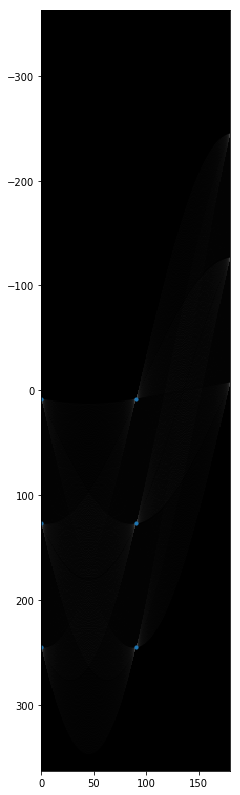

In [85]:
figsize(14, 14)

peaks = hough_peaks(h, 10)
peaks = [(rh-max_rho, th) for rh, th in peaks]

fig = plt.figure()
imshow_grayscale(h, extent=(0, 180, max_rho, -max_rho))
y, x = zip(*peaks)
plt.scatter(x, y, s=10)
plt.gca().set_xlim(0, 180)

peaks


c) Write a function hough_lines_draw to draw color lines that correspond to peaks found in the accumulator array.

(256, 0)

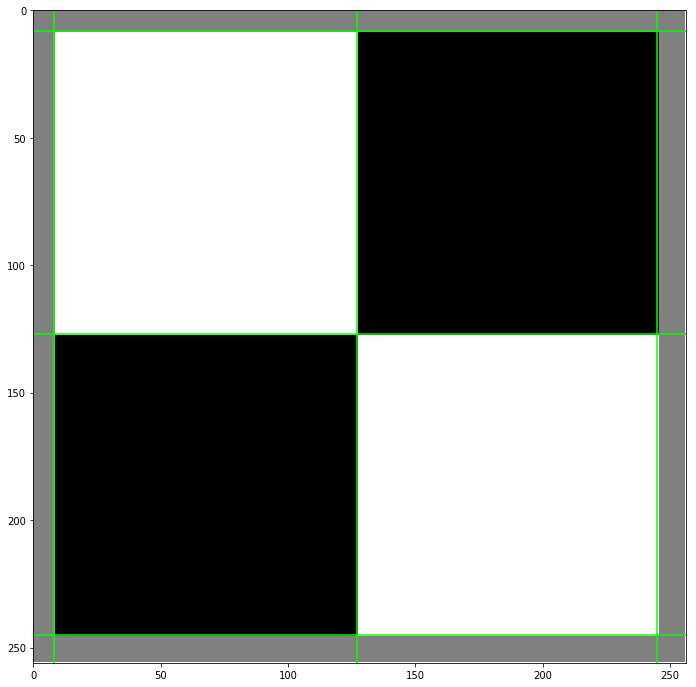

In [86]:
figsize(12, 12)

imshow_grayscale(im)
hough_lines_draw(im, peaks)

plt.gca().set_xlim(0, im.shape[1])
plt.gca().set_ylim(im.shape[0], 0)

### 3) Now we’re going to add some noise.

a) Use ps1-input0-noise.png - same image as before, but with noise. Compute a modestly smoothed version of this image by using a Gaussian filter. Make σ at least a few pixels big.


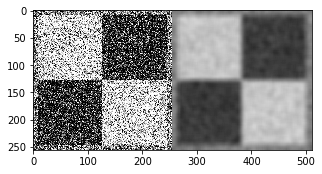

In [148]:
figsize(5, 5)

im = cv2.imread("ps1_python/input/ps1-input0-noise.png", cv2.IMREAD_GRAYSCALE)
im_smooth = cv2.GaussianBlur(im, (15, 15), 5.)

imshow_grayscale_m((im, im_smooth))


b) Using an edge operator of your choosing, create a binary edge image for both the original image (ps1-input0-noise.png) and the smoothed version above.


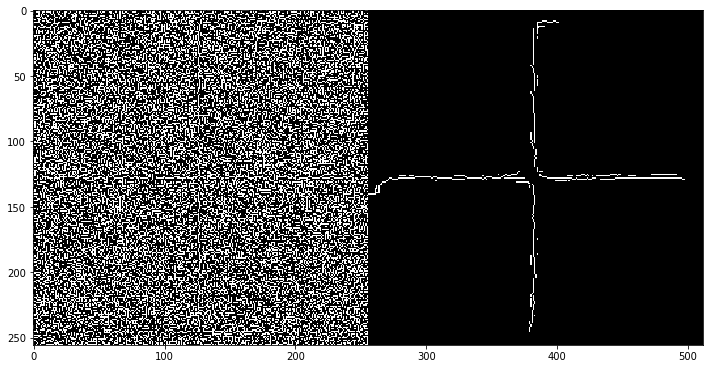

In [149]:
figsize(12, 12)
c = cv2.Canny(im, 10, 100)
c_smooth = cv2.Canny(im_smooth, 10, 100)
imshow_grayscale_m((c, c_smooth))


c) Now apply your Hough method to the smoothed version of the edge image. Your goal is to adjust the filtering, edge finding, and Hough algorithms to find the lines as best you can in this test case.


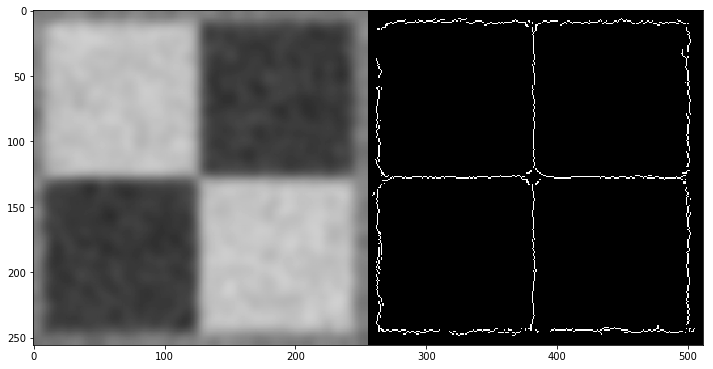

In [177]:
figsize(12, 12)

im_smooth = cv2.GaussianBlur(im, (31, 31), 4.5)
c_smooth = cv2.Canny(im_smooth, 25, 50)
imshow_grayscale_m((im_smooth, c_smooth))


[(126, 0),
 (127, 90),
 (244, 0),
 (9, 90),
 (244, 90),
 (7, 0),
 (-241, 179),
 (-5, 179)]

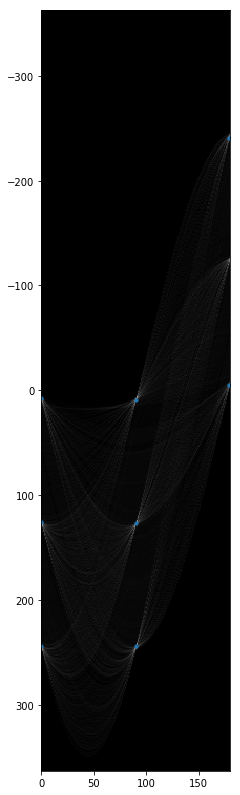

In [181]:
figsize(14, 14)

h, max_rho = hough_lines_acc(c_smooth)
peaks = hough_peaks(h, 10)
peaks = [(rh-max_rho, th) for rh, th in peaks]

fig = plt.figure()
imshow_grayscale(h, extent=(0, 180, max_rho, -max_rho))
y, x = zip(*peaks)
plt.scatter(x, y, s=10)
plt.gca().set_xlim(0, 180)

peaks


(256, 0)

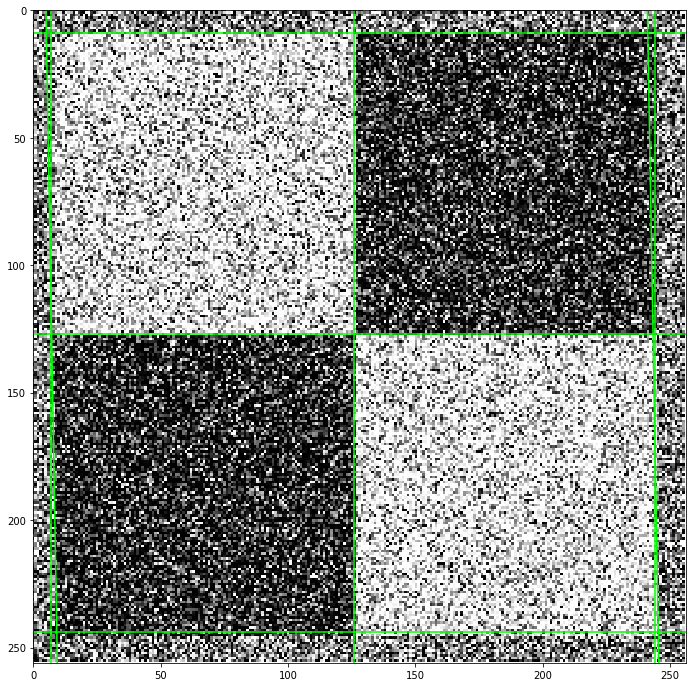

In [182]:
figsize(12, 12)

imshow_grayscale(im)
hough_lines_draw(im, peaks)

plt.gca().set_xlim(0, im.shape[1])
plt.gca().set_ylim(im.shape[0], 0)